In [61]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#load the dataset
data = pd.read_csv('My churn project.csv')


In [9]:
#Explore the dataset
print(data.head())
print(data.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [8]:
#Removing ColumnID
df_data = data.drop('customerID', axis = 1)

In [9]:
# Checking if there is missing data 
df_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Checking for duplicate values
print('Number of duplicate values in dataset:', df_data.duplicated().sum())

Number of duplicate values in dataset: 0


In [11]:
#Get the list of column names in the dataframe
columns = list(df_data.columns)
#Initialize lists to store categorical and numerical names
categoric_columns = []
numeric_columns = []
#Loop through each column
for i in columns:
    #check if the number of unique values is greater than 6
    if len(df_data[i].unique()) > 6:
        numeric_columns.append(i)
    else: 
        categoric_columns.append(i)
#Exclude the last column ('churn') from the list of categorical columns
categoric_columns =  categoric_columns[:-1]

print(numeric_columns)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for columns in categoric_columns:
    df_data[columns] = label_encoder.fit_transform(df_data[columns])
print(df_data.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

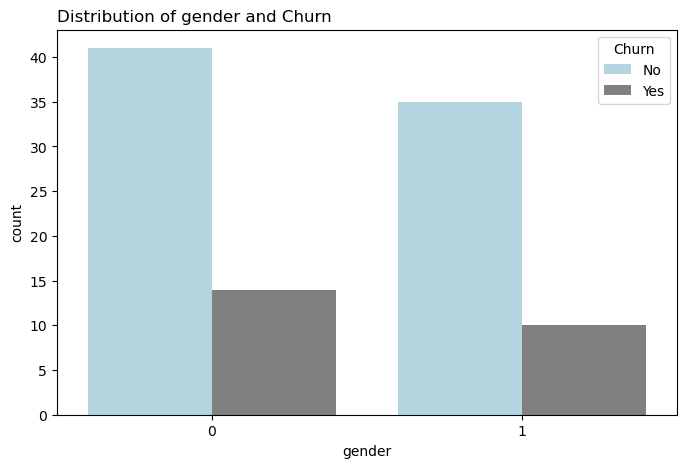

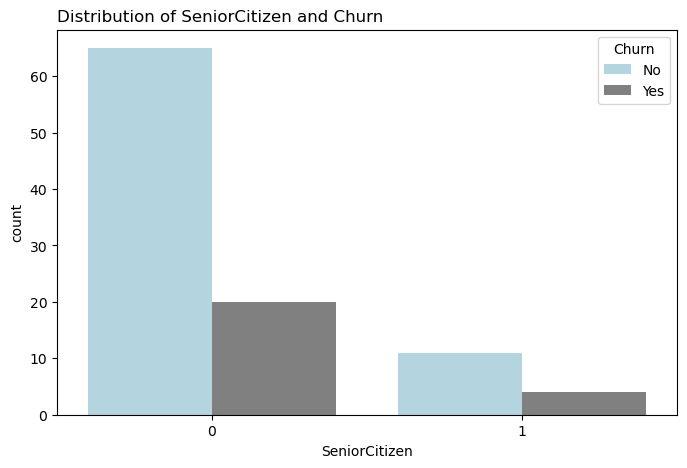

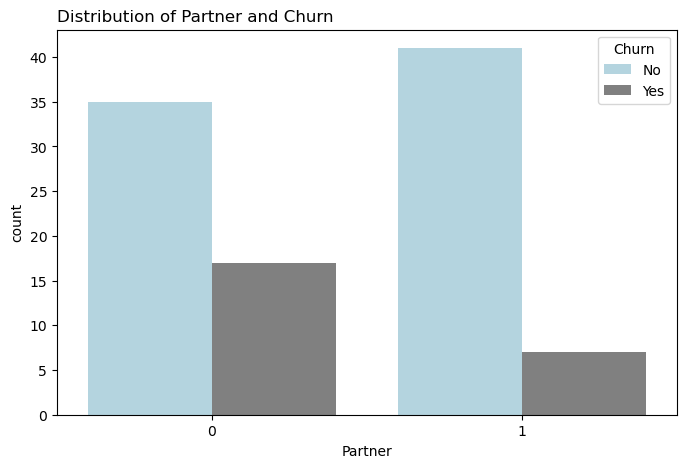

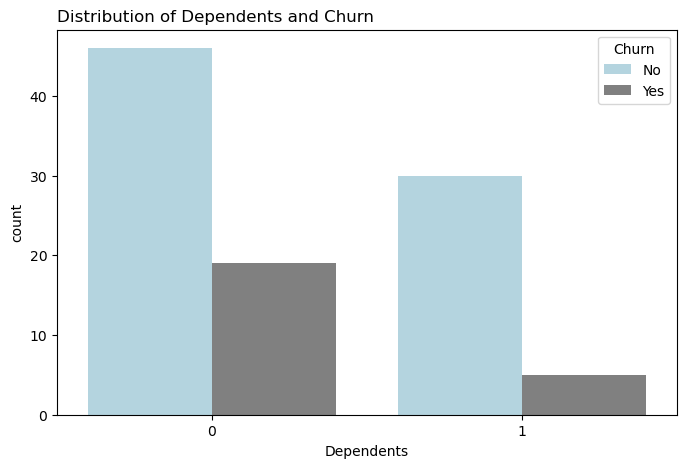

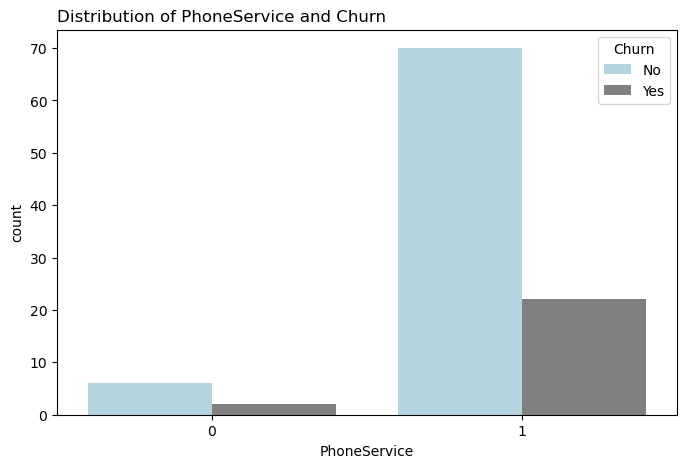

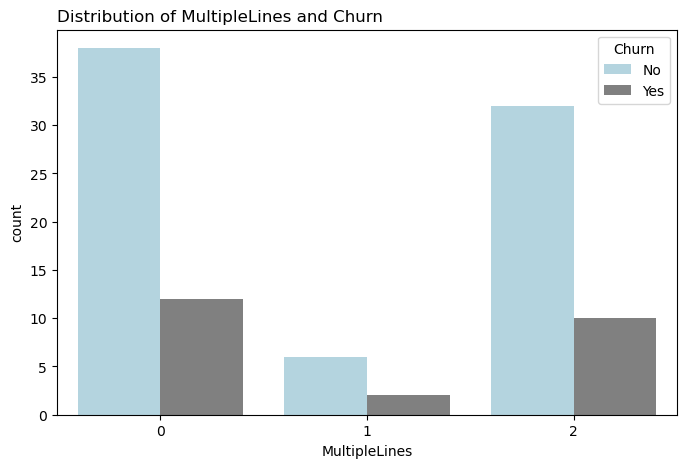

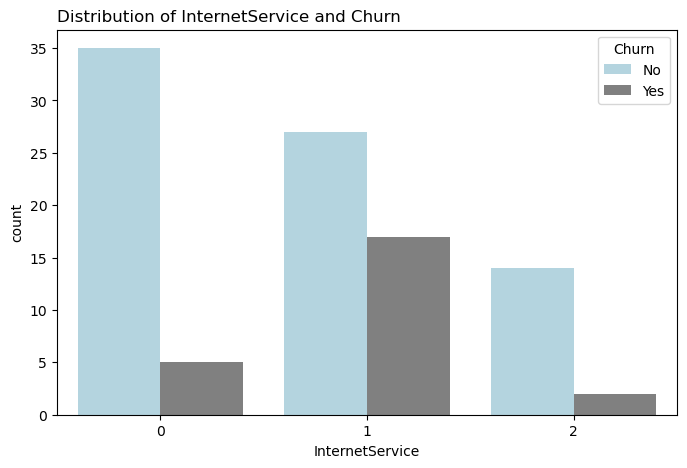

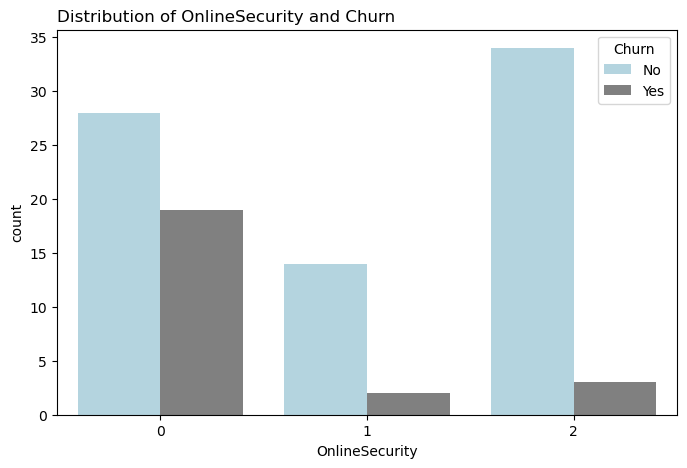

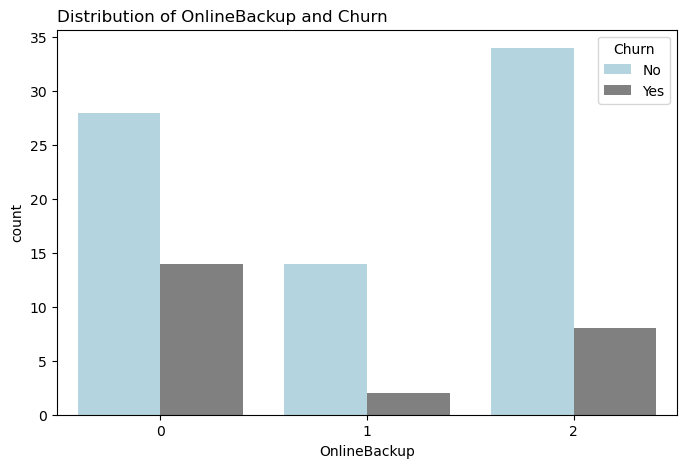

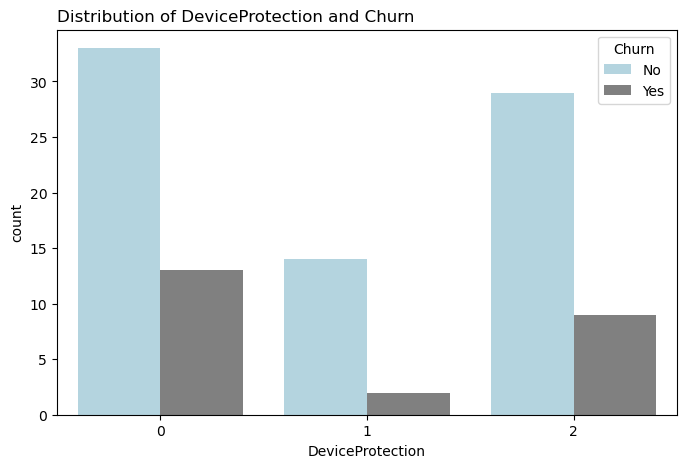

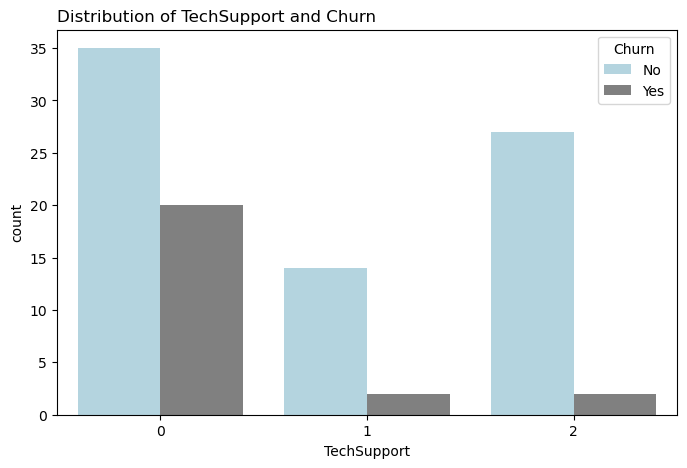

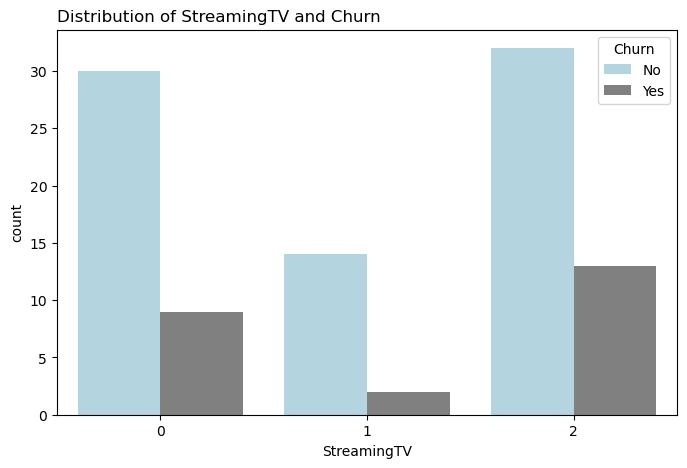

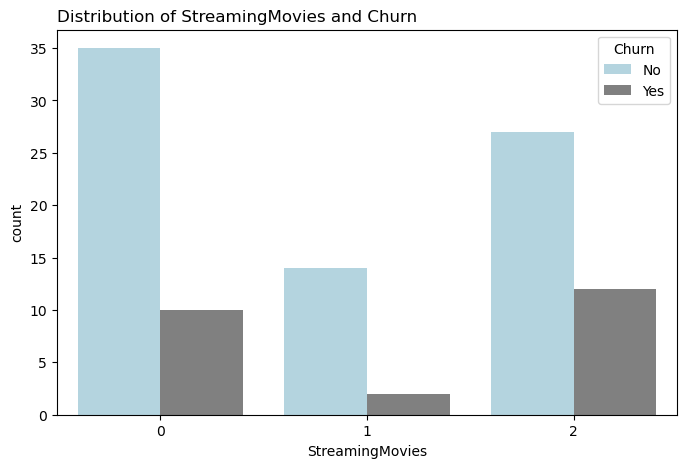

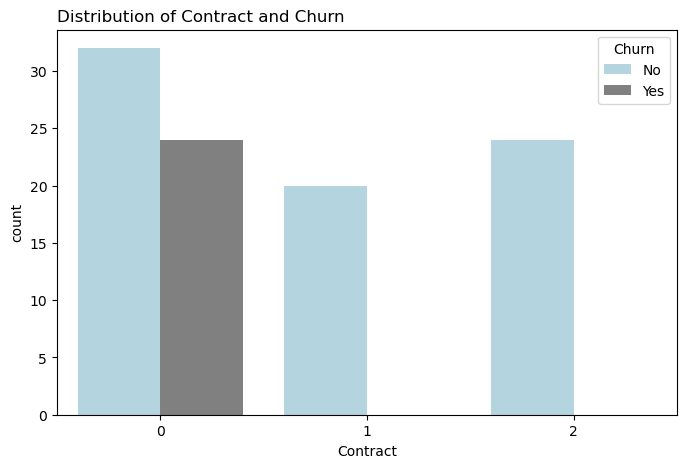

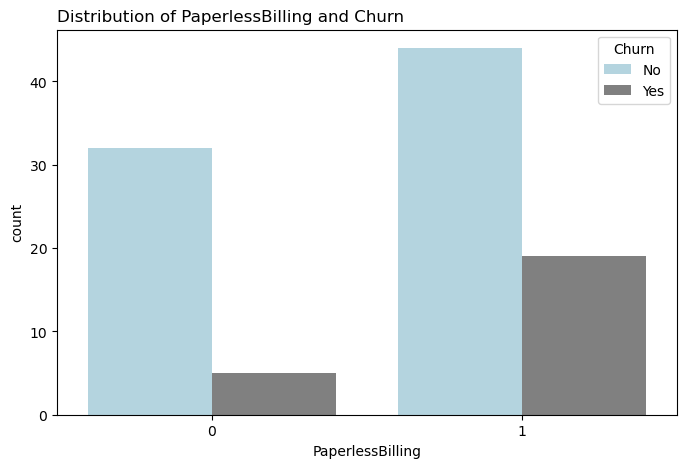

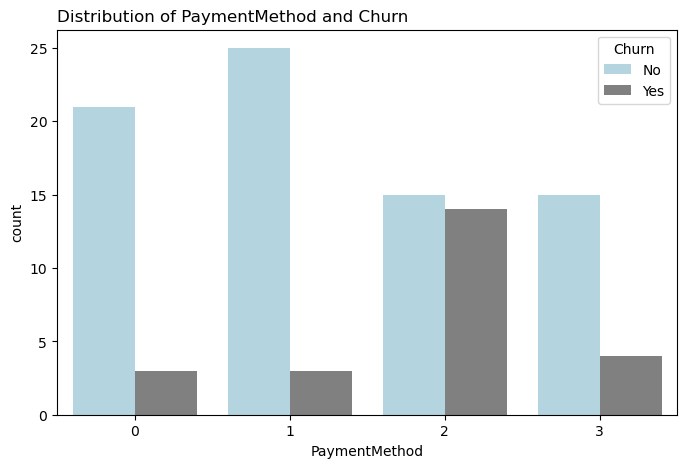

In [13]:
categoric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]
for columns in categoric_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df_data, x=columns, hue='Churn', palette = ['lightblue', 'grey'])
    plt.title(f'Distribution of {columns} and Churn', loc='left')
    plt.show()
    


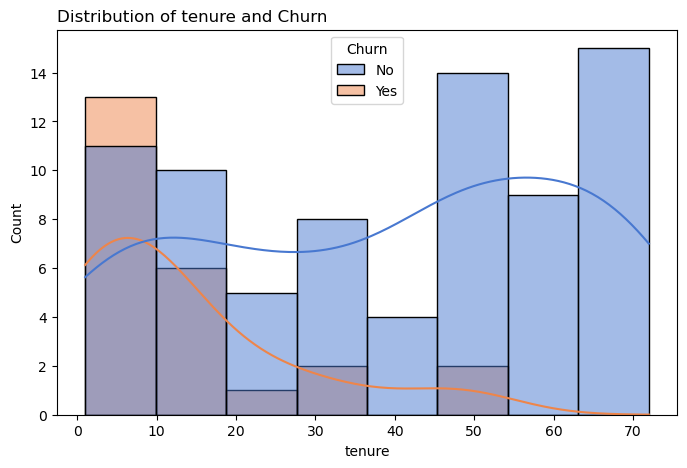

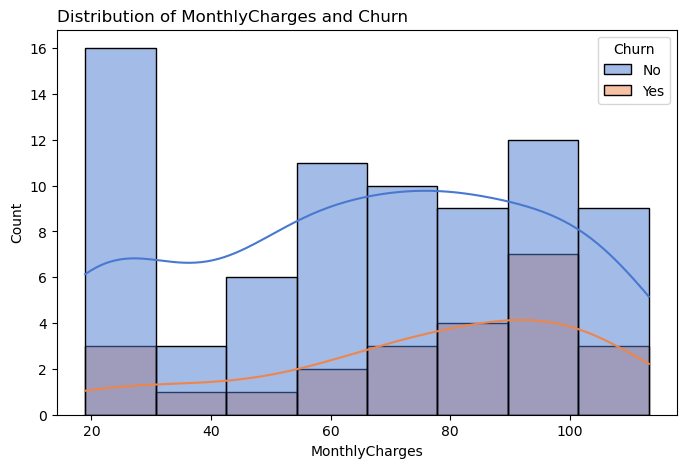

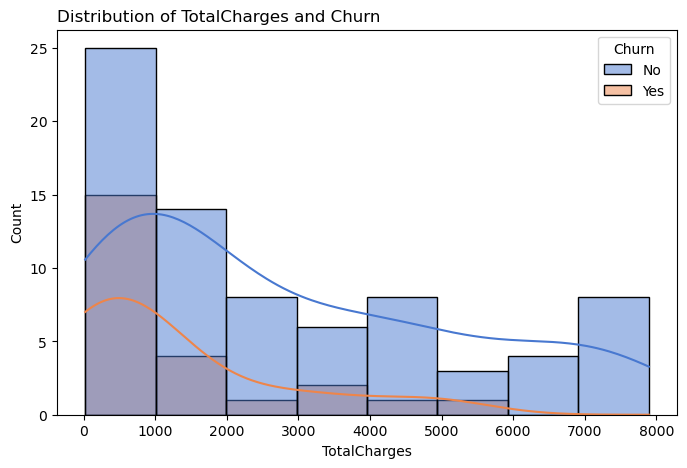

In [14]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for columns in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data= df_data, x=columns, kde=True, hue='Churn', palette='muted')
    plt.title(f'Distribution of {columns} and Churn', loc='left')
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

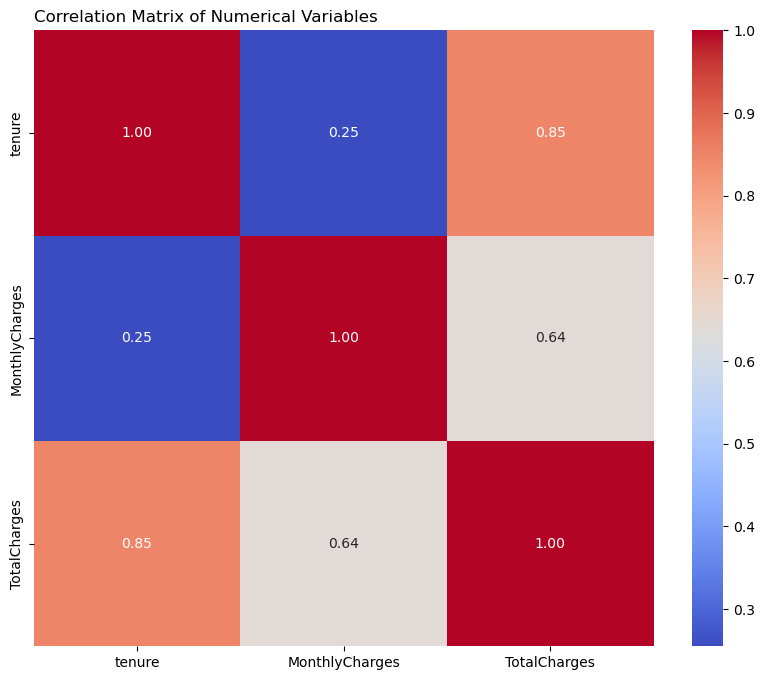

In [15]:
correlation_matrix = df_data[numeric_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', loc='left')
plt.show

In [16]:
# Checking if there is outliers in the dataset
Q1 = df_data[numeric_columns].quantile(0.25)
Q3 = df_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
Outliers = ((df_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
Outliers_row = df_data[Outliers]
print(Outliers)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


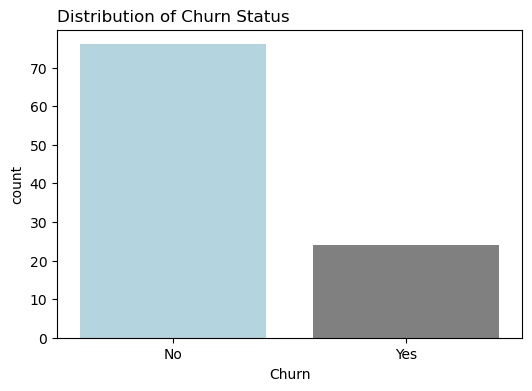

In [17]:
#Checking imbalance of the target variable by visual inspection
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data = df_data, palette=['lightblue', 'grey'])
plt.title('Distribution of Churn Status', loc='left')
plt.show()

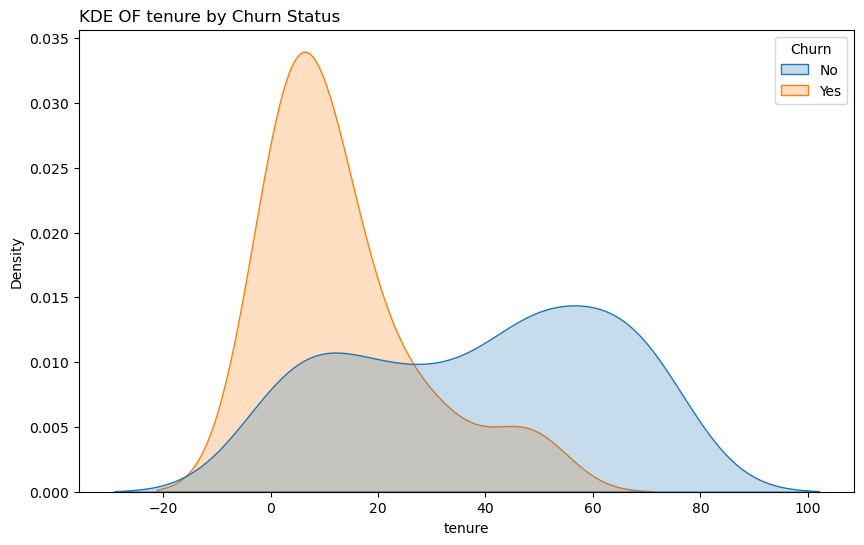

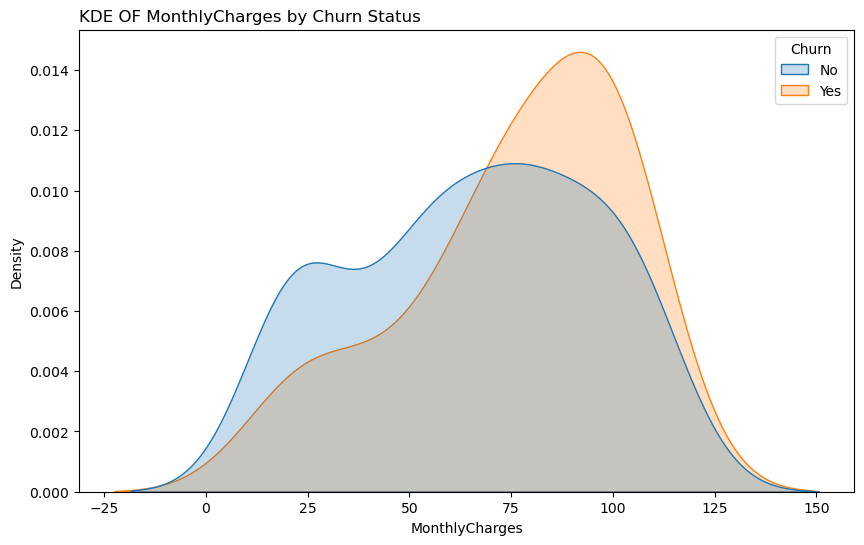

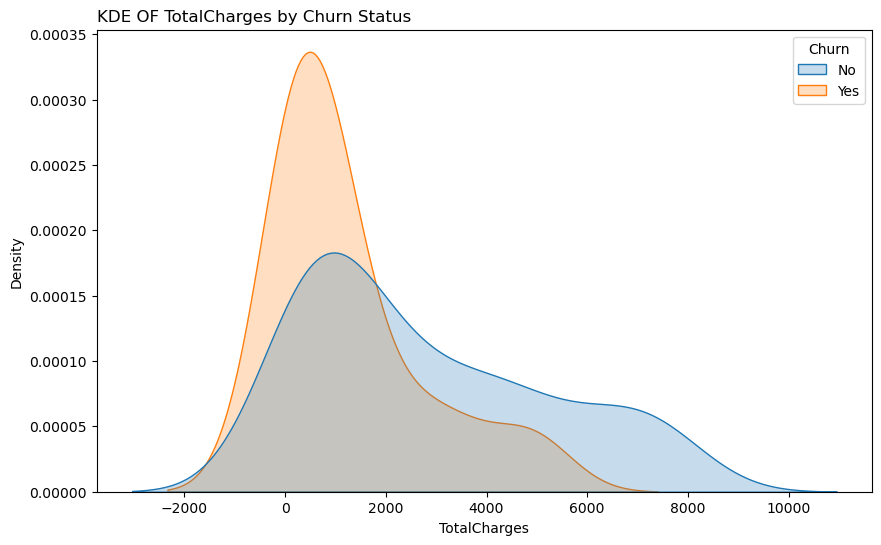

In [18]:
# Checking the pdf of numeric functions
for col in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.kdeplot(data= df_data, x= col, hue='Churn', fill= True, common_norm=False)
    plt.title(f'KDE OF {col} by Churn Status', loc='left')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [45]:
#Preprocessing the dataset
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Define Transformers for numeric and categorical features
categorical_features = categoric_columns
numerical_features = ['tenure', 'MonthlyCharges','TotalCharges']
target_variable  = 'Churn'
X = df_data.drop(target_variable, axis=1)
y = df_data[target_variable]
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                     ('scaler', StandardScaler())])
categoric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                      ('onehot', OneHotEncoder(handle_unknown='ignore'))])
#Combine transformers using columntransformer
preprocessor = ColumnTransformer(transformers= [
    ('num',numeric_transformer, numerical_features),
    ('cat', categoric_transformer, categorical_features)
])  
# Encoding target variable
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
#Full pipeline processor
full_pipeline_processor = Pipeline(steps=[('preprocessor',preprocessor),
                                         ('target_encoder', target_encoder)])

In [52]:
# Predicting the model using RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
full_pipeline_processor = Pipeline(steps=[('preprocessor',preprocessor),
                                         ('classifier', RandomForestClassifier(random_state=42))])
#fit the pipeline to the training data
full_pipeline_processor.fit(X_train, y_train_encoded)
# Predicting the model 
y_pred = full_pipeline_processor.predict(X_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)
print(y_pred_decoded)
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"Accuracy: {accuracy}")



['No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes']
Accuracy: 0.75


In [53]:
# Predicting the model using LogisticRegression
from sklearn.linear_model import LogisticRegression
full_pipeline_processor = Pipeline(steps=[('preprocessor',preprocessor),
                                         ('classifier', LogisticRegression(random_state=42))])
#fit the pipeline to the training data
full_pipeline_processor.fit(X_train, y_train_encoded)
# Predicting the model 
y_pred = full_pipeline_processor.predict(X_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)
print(y_pred_decoded)
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"Accuracy: {accuracy}")


['No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'Yes']
Accuracy: 0.75


In [54]:
# Predicting the model using SupportVectorMachine Classifier
from sklearn.svm import SVC
full_pipeline_processor = Pipeline(steps=[('preprocessor',preprocessor),
                                         ('classifier', SVC(random_state=42))])
#fit the pipeline to the training data
full_pipeline_processor.fit(X_train, y_train_encoded)
# Predicting the model 
y_pred = full_pipeline_processor.predict(X_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)
print(y_pred_decoded)
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"Accuracy: {accuracy}")

['No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'Yes']
Accuracy: 0.8


In [55]:
# Predicting the model using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
full_pipeline_processor = Pipeline(steps=[('preprocessor',preprocessor),
                                         ('classifier', DecisionTreeClassifier(random_state=42))])
#fit the pipeline to the training data
full_pipeline_processor.fit(X_train, y_train_encoded)
# Predicting the model 
y_pred = full_pipeline_processor.predict(X_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)
print(y_pred_decoded)
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"Accuracy: {accuracy}")

['No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes']
Accuracy: 0.7


In [57]:
# Predicting the model using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
full_pipeline_processor = Pipeline(steps=[('preprocessor',preprocessor),
                                         ('classifier', KNeighborsClassifier())])
#fit the pipeline to the training data
full_pipeline_processor.fit(X_train, y_train_encoded)
# Predicting the model 
y_pred = full_pipeline_processor.predict(X_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)
print(y_pred_decoded)
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"Accuracy: {accuracy}")

['Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'Yes']
Accuracy: 0.75


In [63]:
# Predicting the model using NeuralNetworks
from sklearn.neural_network import MLPClassifier
full_pipeline_processor = Pipeline(steps=[('preprocessor',preprocessor),
                                         ('classifier', MLPClassifier(random_state=42, max_iter=500))])
#fit the pipeline to the training data
full_pipeline_processor.fit(X_train, y_train_encoded)
# Predicting the model 
y_pred = full_pipeline_processor.predict(X_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)
print(y_pred_decoded)
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"Accuracy: {accuracy}")

['No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes']
Accuracy: 0.75
